# Using Deep Neural Network for our mnist fashion data



In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth= 200)


In [2]:
mnist = keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0
# We flatten: the first layer should always be the same as the shape of your data
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), 
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(training_images,training_labels, epochs = 20)
test_loss =model.evaluate(test_images,test_labels)


4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6301 - accuracy: 0.7838
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3888 - accuracy: 0.8603
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3461 - accuracy: 0.8737
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3175 - accuracy: 0.8827
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2981 - accuracy: 0.8894
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2866 - accuracy: 0.8943
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2705 - accuracy: 0.9002
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2605 - accuracy: 0.9026
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2521 - accuracy: 0.9050
Epoch 10/20
1875/18

In [3]:
classification = model.predict(test_images)

In [4]:
classification[0]

array([1.06118669e-08, 3.07987941e-11, 6.88245994e-09, 5.06473918e-10, 5.71177550e-11, 1.02123246e-04, 9.28994770e-10, 1.83490722e-03, 8.50579074e-09, 9.98062909e-01], dtype=float32)

In [5]:
print(test_labels[0])

9


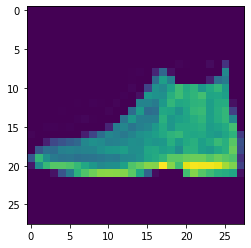

In [6]:
plt.imshow(test_images[0])

# we will use Convnet to improve our accuracy and loss

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.


The parameters of a convnet are very small compare to a fully connected layer, the reasons are :
(i) Parameter sharing: A feature detector (such as vertical edge detector) that is useful in one part of the image is probably useful in another part of the image

(ii) Spasity of connections: In each layer each output value depends on a small number of inputs( each value(features) of the output depends on only specific features of the input computed by the filter). So this makes it less prone to overfitting with smaller training sets

(iii) capturing translation invariance :A picture of a cat shifted a couple of pixels to the right, is still pretty clearly a cat. This helps to encode the fact that,an image shifted a few pixels should result in pretty similar features and should probably be assigned the same label

In [19]:
# the common pattern of a conv is CONV -- POOL -- CONV --- FC -- FC -- SOFTMAX
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('loss') < 0.05):
      print("\nReached 99 % accuracy so cancelling training")
      self.model.stop_training = True
callbacks = MyCallBack()


mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#That's because the first convolution expects a single tensor containing everything, 
#so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1.
#Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. 
#Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. 
#We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.
training_images = training_images.reshape(60000, 28,28,1) 
training_images = training_images / 255.0
test_images =   test_images.reshape(10000,28,28,1)
test_images = test_images / 255.0


model = keras.Sequential([keras.layers.Conv2D(64, (3,3),activation='relu',input_shape =(28,28,1)),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax') ])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs= 20, callbacks = [callbacks])

loss = model.evaluate(test_images, test_labels)

Epoch 1/20
1875/1875 [==============================] - 80s 42ms/step - loss: 0.6031 - accuracy: 0.7836
Epoch 2/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.3064 - accuracy: 0.8883
Epoch 3/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2450 - accuracy: 0.9113
Epoch 4/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2099 - accuracy: 0.9221
Epoch 5/20
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1813 - accuracy: 0.9335
Epoch 6/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1619 - accuracy: 0.9392
Epoch 7/20
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1402 - accuracy: 0.9475
Epoch 8/20
1875/1875 [==============================] - 78s 41ms/step - loss: 0.1231 - accuracy: 0.9539
Epoch 9/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1081 - accuracy: 0.9589
Epoch 10/20
1875/1875 [==============================] - 75s 40m

In [ ]:
model.summary()  

# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [8]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4
 2]


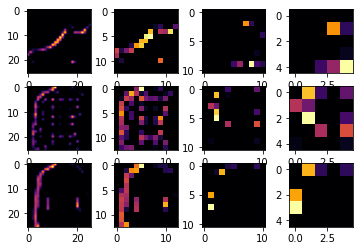

In [11]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 4)
first_image = 0
second_image = 7
third_image = 26
conv_number = 1
from tensorflow.keras import models
layer_output = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_output)
for x in range(0,4):
  f1 = activation_model.predict(test_images[first_image].reshape(1,28,28,1))[x]
  axarr[0 , x].imshow(f1[0,: ,:, conv_number], cmap = 'inferno')
  axarr[0, x].grid(False)
  f2 = activation_model.predict(test_images[second_image].reshape(1, 28, 28, 1))[x]
  axarr[1, x].imshow(f2[0, : , :, conv_number], cmap = 'inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[third_image].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0, : , : , conv_number], cmap = 'inferno')
  axarr[2, x].grid(False)